In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create model class that inherits nn.module
class Model(nn.Module):
    # Input layer (4 features of flower): sepal length;sepal width;petal length; petal width 
    #  --> Hidden layer1 (number of neurons)
    #  --> H2 (n) --> output (3 classes of iris flower)
    # in_features are the 4 features of flower
    # h1 and h2 integers are number of neurons within the hidden layer
    # out_features are the classes to which we may classify the dataset
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super(Model, self).__init__()
        # Setting up layers (this creates a fully connected graph)
        self.fc1 = nn.Linear(in_features, h1)  # Pass features into first layer
        self.fc2 = nn.Linear(h1, h2)  # Pass features into second layer
        self.out = nn.Linear(h2, out_features) # Pass features into output layer
        
    def forward(self, x):
        # Start with layer 1
        x = F.relu(self.fc1(x))  # Rectified linear unit - Do something and if the output is less than 0 return 0 otherwise return the value
        # Continue with layer 2
        x = F.relu(self.fc2(x))
        # Continue to output layer
        x = self.out(x)
        return x

In [3]:
# Manual seed for randomization
torch.manual_seed(41)
model = Model()

# Load Data and Train Neural Network Model

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)  # Dataframe

In [6]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
# Change last column to ints
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

C:\Users\Martin\AppData\Local\Temp\ipykernel_301284\316928088.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


In [8]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
# Train Test Split! Set X, y
# X is the input data (features of flowers)
# y is the output data (flower type)
X = my_df.drop('variety', axis=1)  # Gets rid of variety column
y = my_df['variety']  # Grabs only the variety column

In [10]:
# Convert these to numpy array
X = X.values
y = y.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [13]:
# Convert features (X) and labels (y) to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
# Set the criterion of model to measure the error, how far off are the predictions from reality
criterion = nn.CrossEntropyLoss()
# Optimizer - sends stuff through and through and through and it optimizes. We'll use Adam Optimizer
# if error does not go down after a bunch of iterations (epochs) we'll lower the  learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



In [15]:
model.parameters
# we have 3 model parameters (layer one, layer two and output layer)
# epoch is sending all data through that once
# we optimize everytime we go through

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [16]:
# Train model!!!!!!!!
# Epochs? (one run thru all the training data in network)
epochs = 100
losses = []
for epoch in range(epochs):
    # Go forward and get a prediction (type of flower)
    y_pred = model.forward(X_train) # Get predicted results. (We use X_train which contains the 4 features of flower)
    
    # Measure loss
    loss_tensor = criterion(y_pred, y_train)  # Predicted value vs actual value
    loss_arr = loss_tensor.detach().numpy()
    losses.append(loss_arr)
    
    if epoch % 10 == 0:
        print('Epoch {}/{}, Loss: {:.4f}'.format(epoch + 1, epochs, loss_arr))
    
    # Back propagation: take error rate of forward propagation and feed it back through the network to fine tune weights
    optimizer.zero_grad()
    loss_tensor.backward()
    optimizer.step()

Epoch 1/100, Loss: 1.1252
Epoch 11/100, Loss: 1.0097
Epoch 21/100, Loss: 0.8162
Epoch 31/100, Loss: 0.5860
Epoch 41/100, Loss: 0.4003
Epoch 51/100, Loss: 0.2679
Epoch 61/100, Loss: 0.1796
Epoch 71/100, Loss: 0.1217
Epoch 81/100, Loss: 0.0861
Epoch 91/100, Loss: 0.0652


Text(0.5, 0, 'epoch')

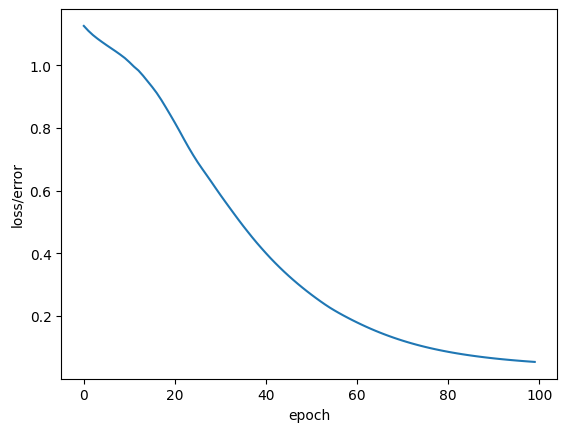

In [17]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

# Evaluate Test Data Set on network

In [18]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Turn off back propagation
    y_eval = model.forward(X_test)  # X_test are features from out test set, y_eval will be predictions
    loss = criterion(y_eval, y_test)

In [19]:
loss

tensor(0.1315)

In [20]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
        # Will tell us what type of flower class out network think it is
        print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t  {y_val.argmax().item()}")
        
        # Correct or not
        #  Our prediction        == actual thing?
        if y_val.argmax().item() == y_test[i]:
            correct += 1
            
print(f"We got {correct} correct")
            

1.) tensor([-5.8771,  4.4629,  6.5155]) 	 2 	  2
2.) tensor([-7.5451,  4.1668,  9.7293]) 	 2 	  2
3.) tensor([-8.4517,  5.1275, 10.2015]) 	 2 	  2
4.) tensor([-4.3411,  5.6280,  2.5636]) 	 1 	  1
5.) tensor([-7.1838,  4.8757,  8.3023]) 	 2 	  2
6.) tensor([-3.3940,  5.3421,  1.2802]) 	 1 	  1
7.) tensor([-5.9240,  4.9826,  6.0025]) 	 2 	  2
8.) tensor([-4.2895,  5.7016,  2.3920]) 	 1 	  1
9.) tensor([-6.5369,  4.9261,  7.1291]) 	 2 	  2
10.) tensor([-8.0526,  4.4129, 10.3325]) 	 2 	  2
11.) tensor([-5.6775,  4.9505,  5.6248]) 	 2 	  2
12.) tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	  0
13.) tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	  0
14.) tensor([-2.1081,  4.0482,  0.5803]) 	 1 	  1
15.) tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	  0
16.) tensor([-5.4739,  5.1174,  5.0966]) 	 2 	  1
17.) tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	  0
18.) tensor([-5.8090,  4.6057,  6.2494]) 	 1 	  2
19.) tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	  0
20.) tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	  0
21.) tens

In [21]:
# Based on random state we can get closer
torch.manual_seed(32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Evaluate NEW Data On The Network

In [22]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [23]:
with torch.no_grad():
    print(model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])


In [24]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [25]:
with torch.no_grad():
    print(model(newer_iris))

tensor([-5.9960,  4.5080,  6.6831])


# Save and Load model

In [26]:
# Save our NN model
torch.save(model.state_dict(), 'BasicNeuralNetwork.pt')

In [27]:
# Load saved model
new_model = Model()
new_model.load_state_dict(torch.load('BasicNeuralNetwork.pt'))

<All keys matched successfully>

In [28]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)